In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

### MNIST dataset

In [91]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [27]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

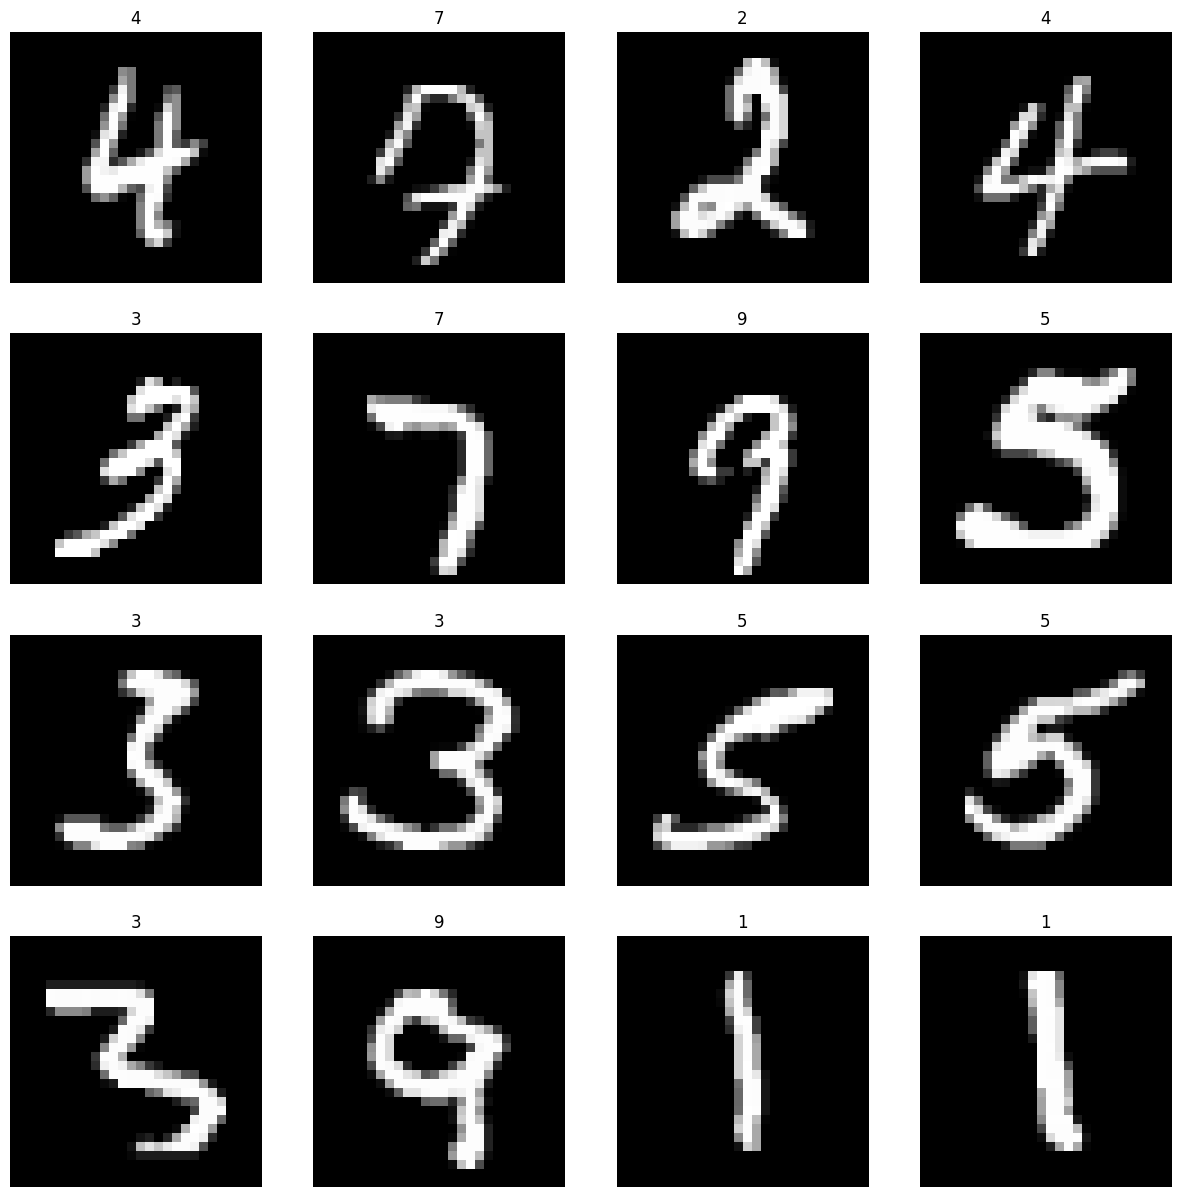

In [64]:
plt.figure(figsize=(15, 15))
for i in range (16):
    rand_num = np.random.randint(0, 50000)
    plt.subplot(4,4, i+1)
    plt.imshow(x_train[rand_num], cmap='gray')
    plt.axis('off')
    plt.title(y_train[rand_num])

In [31]:
mnist = keras.Sequential([
    keras.layers.Rescaling(1/255.0, input_shape=(28,28, 1)),
    
    keras.layers.Conv2D(8, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])


mnist.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
mnist.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 batch_normalization_12 (Bat  (None, 28, 28, 8)        32        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 batch_normalization_13 (Bat  (None, 14, 14, 16)      

In [33]:
mnist.fit(x_train, y_train, validation_split=0.2,batch_size=32, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1242 - accuracy: 0.9621 - val_loss: 0.0735 - val_accuracy: 0.9794
Epoch 2/5
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0564 - val_accuracy: 0.9840
Epoch 3/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0346 - accuracy: 0.9893 - val_loss: 0.0512 - val_accuracy: 0.9862
Epoch 4/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0568 - val_accuracy: 0.9861
Epoch 5/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0217 - accuracy: 0.9933 - val_loss: 0.0477 - val_accuracy: 0.9883


In [34]:
mnist.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0459 - accuracy: 0.9883


[0.045871127396821976, 0.9883000254631042]

In [83]:
mnist.save('models/mnist.h5')

### CIFAR10 dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [46]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

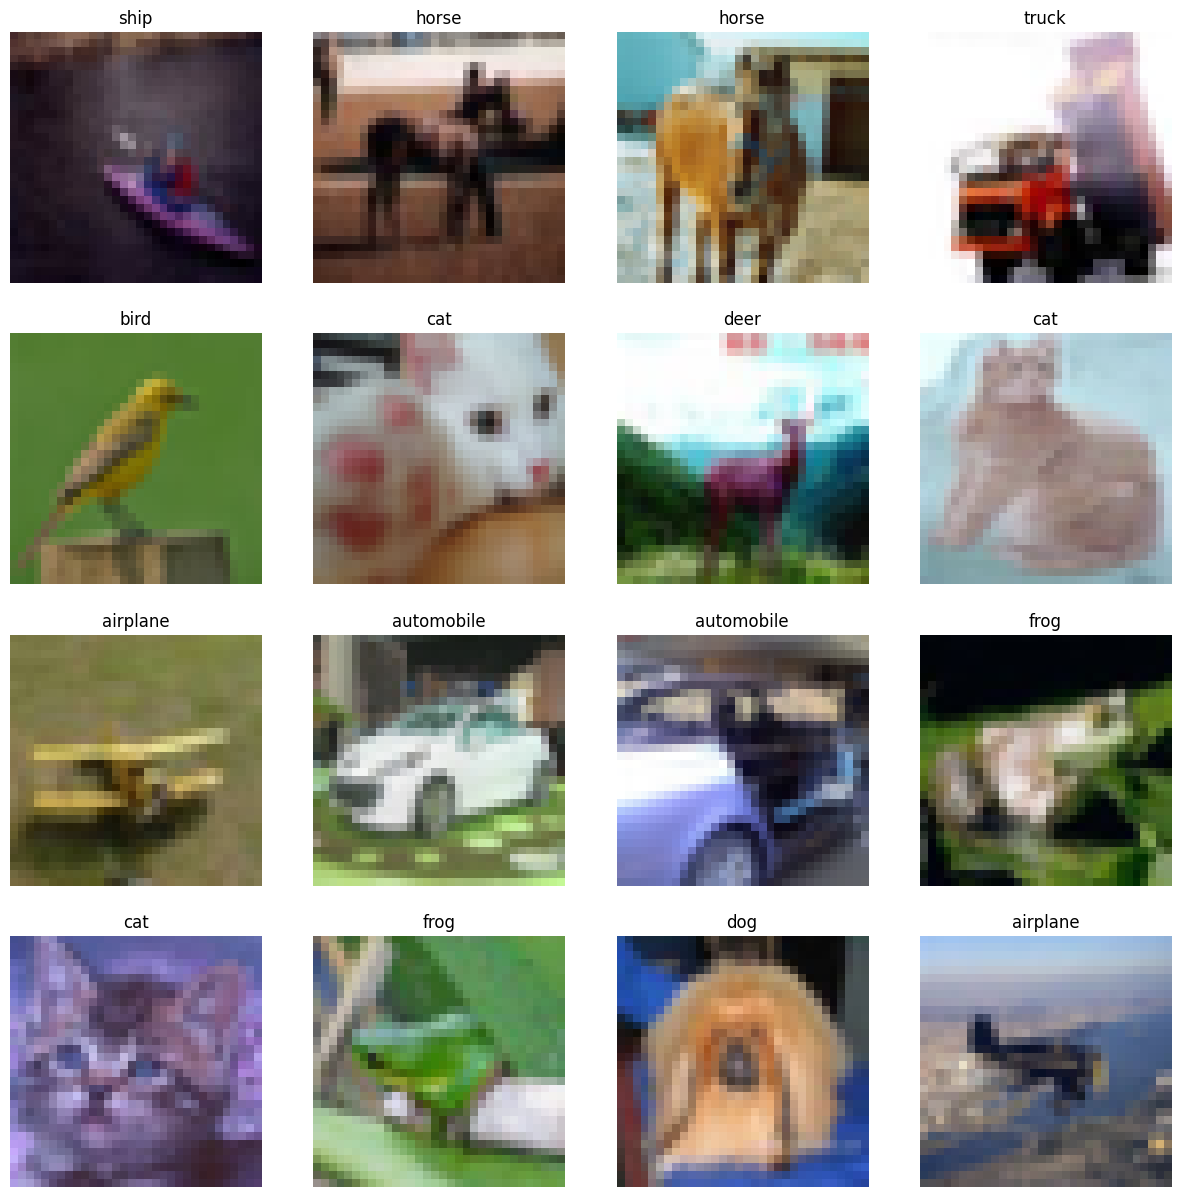

In [62]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(15, 15))
for i in range (16):
    rand_num = np.random.randint(0, 50000)
    plt.subplot(4,4, i+1)
    plt.imshow(x_train[rand_num])
    plt.axis('off')
    plt.title(classes[y_train[rand_num,0]])

In [52]:
cifar10 = keras.Sequential([
    keras.layers.Rescaling(1/255.0, input_shape=(32,32, 3)),
    
    keras.layers.Conv2D(8, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax'),
])


cifar10.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
cifar10.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 8)        32        
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 16)        1168      
                                                                 
 batch_normalization_16 (Bat  (None, 16, 16, 16)      

In [54]:
cifar10.fit(x_train, y_train, validation_split=0.2,batch_size=32, epochs=10)

Epoch 1/10
1250/1250 [==============================] - 14s 10ms/step - loss: 1.4701 - accuracy: 0.4663 - val_loss: 1.3297 - val_accuracy: 0.5308
Epoch 2/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.1374 - accuracy: 0.5931 - val_loss: 1.1631 - val_accuracy: 0.5822
Epoch 3/10
1250/1250 [==============================] - 12s 9ms/step - loss: 0.9995 - accuracy: 0.6439 - val_loss: 1.2208 - val_accuracy: 0.5699
Epoch 4/10
1250/1250 [==============================] - 12s 9ms/step - loss: 0.9047 - accuracy: 0.6798 - val_loss: 1.1327 - val_accuracy: 0.6122
Epoch 5/10
1250/1250 [==============================] - 12s 9ms/step - loss: 0.8353 - accuracy: 0.7056 - val_loss: 1.0797 - val_accuracy: 0.6293
Epoch 6/10
1250/1250 [==============================] - 12s 9ms/step - loss: 0.7727 - accuracy: 0.7233 - val_loss: 0.9878 - val_accuracy: 0.6540
Epoch 7/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.7162 - accuracy: 0.7465 - val_loss: 1.2695 - val

In [55]:
cifar10.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.1247 - accuracy: 0.6451


[1.1247262954711914, 0.6450999975204468]

In [82]:
cifar10.save('models/cifar10.h5')

### CIFAR100 dataset

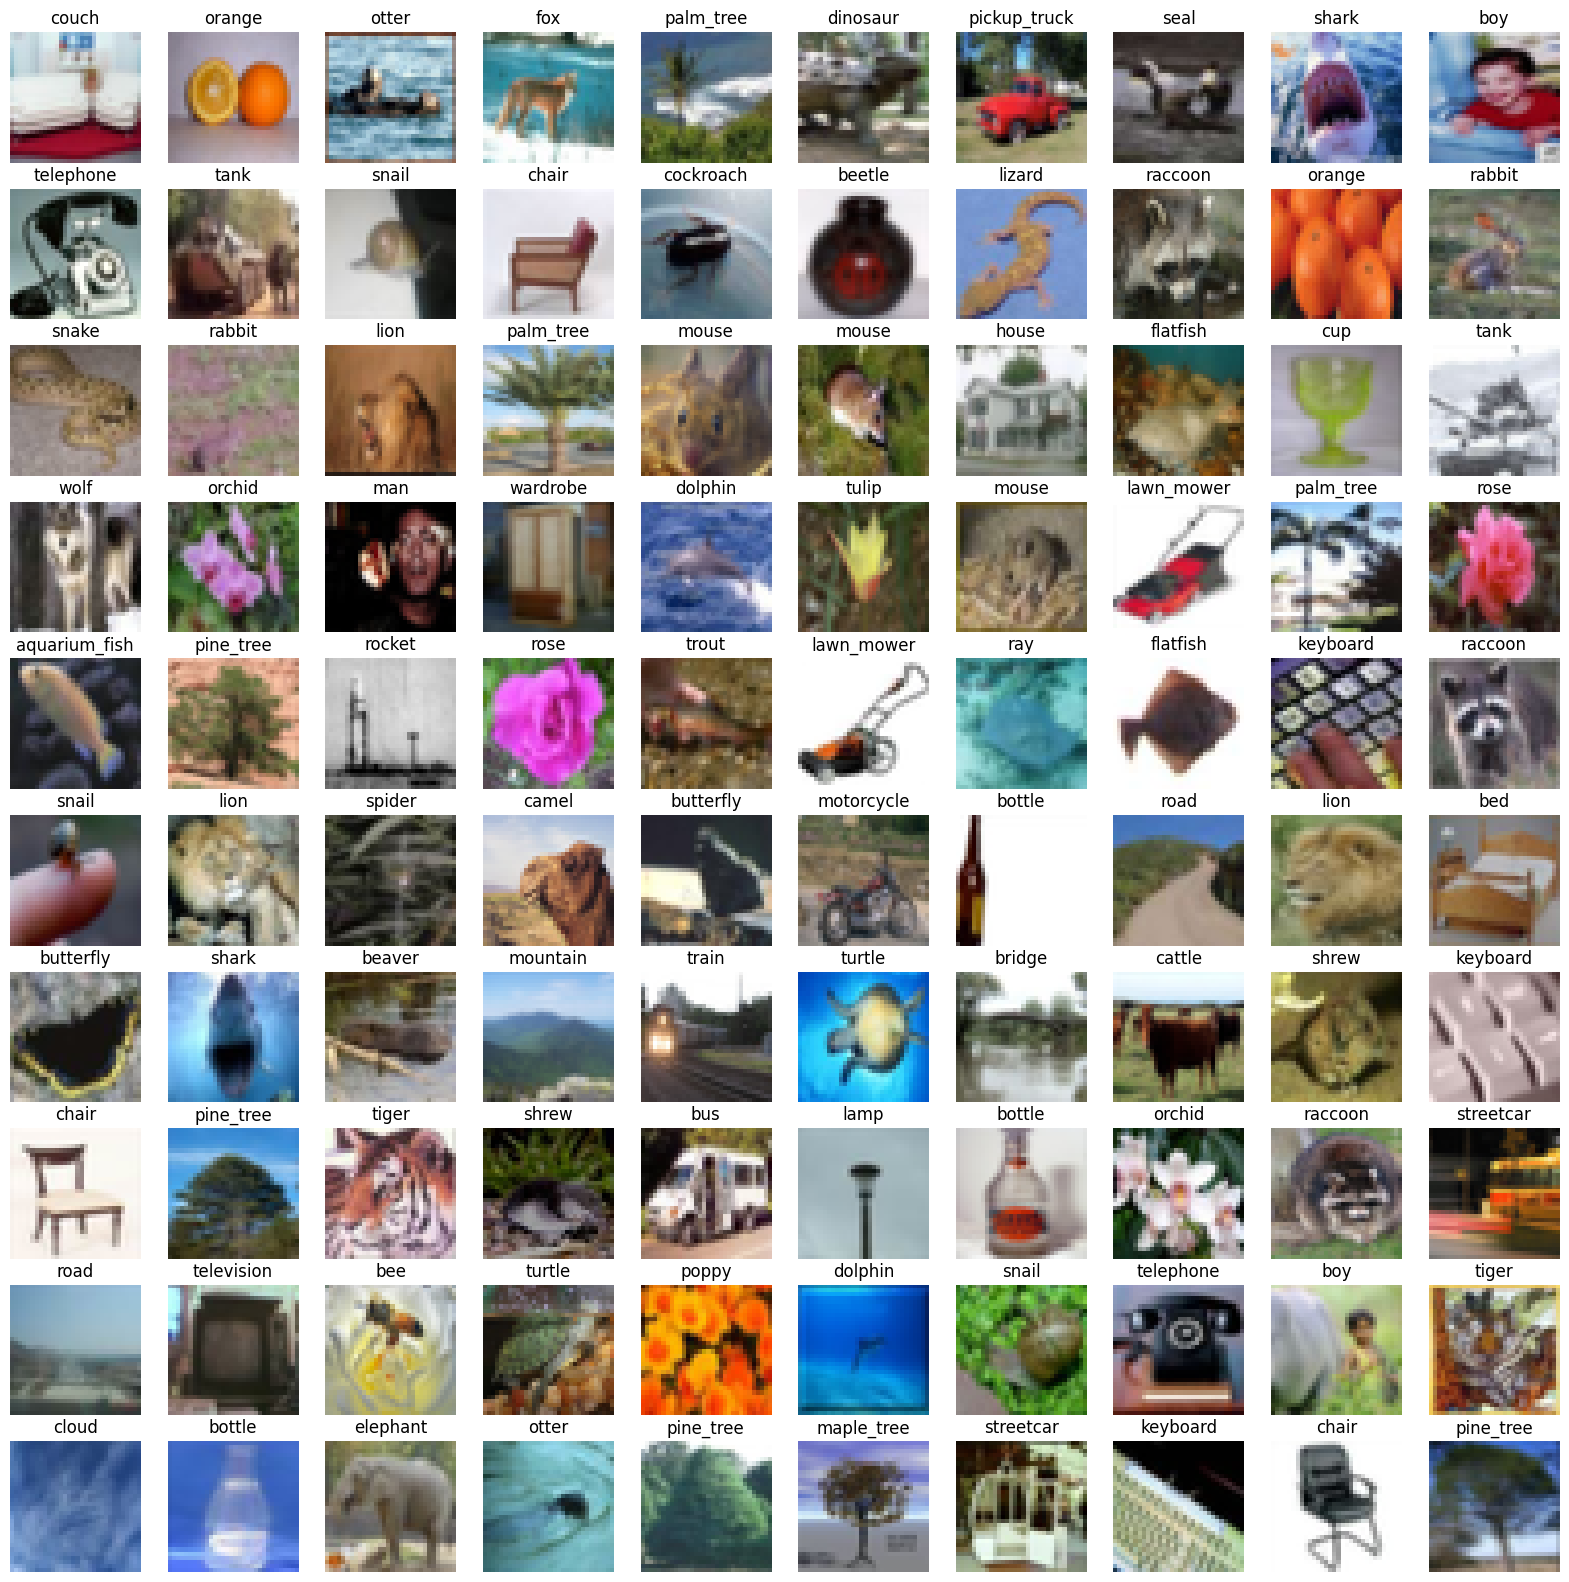

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

classes = ['apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge',\
           'bus','butterfly','camel','can','castle','caterpillar','cattle','chair','chimpanzee','clock','cloud',\
           'cockroach','couch','cra','crocodile','cup','dinosaur','dolphin','elephant','flatfish','forest','fox','girl',\
           'hamster','house','kangaroo','keyboard','lamp','lawn_mower','leopard','lion','lizard','lobster','man',\
           'maple_tree','motorcycle','mountain','mouse','mushroom','oak_tree','orange','orchid','otter','palm_tree',\
           'pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum','rabbit','raccoon','ray','road',\
           'rocket','rose','sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider','squirrel',\
           'streetcar','sunflower','sweet_pepper','table','tank','telephone','television','tiger','tractor','train',\
           'trout','tulip','turtle','wardrobe','whale','willow_tree','wolf','woman','worm',
]
plt.figure(figsize=(20, 20))
for i in range (100):
    rand_num = np.random.randint(0, 50000)
    plt.subplot(10,10, i+1)
    plt.imshow(x_train[rand_num])
    plt.axis('off')
    plt.title(classes[y_train[rand_num,0]])

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 100), (10000, 32, 32, 3), (10000, 100))

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

In [7]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=93)

In [8]:
from tensorflow.keras.initializers import RandomNormal, Constant

model = keras.models.Sequential()
 
model.add(keras.layers.Rescaling(1/255.0, input_shape=(32,32,3)))
model.add(keras.layers.Conv2D(256,(3,3),padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(256,(3,3),padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))
 
model.add(keras.layers.Conv2D(512,(3,3),padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(512,(3,3),padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(512,(3,3),padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(512,(3,3),padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(512,(3,3),padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(512,(3,3),padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
model.add(keras.layers.Dense(100,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                        

In [9]:
model.fit(train_datagen.flow(x_train, y_train, batch_size=64),
          steps_per_epoch=100, 
          epochs=100,
          validation_data=(x_validation, y_validation),
          verbose=1)

Epoch 1/100
100/100 [==============================] - 43s 301ms/step - loss: 4.5326 - acc: 0.0352 - val_loss: 4.8152 - val_acc: 0.0118
Epoch 2/100
100/100 [==============================] - 28s 276ms/step - loss: 4.2213 - acc: 0.0608 - val_loss: 5.1047 - val_acc: 0.0235
Epoch 3/100
100/100 [==============================] - 27s 275ms/step - loss: 4.0623 - acc: 0.0834 - val_loss: 5.0374 - val_acc: 0.0124
Epoch 4/100
100/100 [==============================] - 28s 282ms/step - loss: 3.8868 - acc: 0.0998 - val_loss: 4.4949 - val_acc: 0.0488
Epoch 5/100
100/100 [==============================] - 28s 277ms/step - loss: 3.7819 - acc: 0.1139 - val_loss: 4.1513 - val_acc: 0.0776
Epoch 6/100
100/100 [==============================] - 27s 275ms/step - loss: 3.6454 - acc: 0.1339 - val_loss: 3.8124 - val_acc: 0.1098
Epoch 7/100
100/100 [==============================] - 28s 277ms/step - loss: 3.5058 - acc: 0.1550 - val_loss: 3.7049 - val_acc: 0.1424
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 20s 197ms/step - loss: 1.4273 - acc: 0.5838 - val_loss: 1.8863 - val_acc: 0.5001
Epoch 62/100
100/100 [==============================] - 19s 193ms/step - loss: 1.4072 - acc: 0.5972 - val_loss: 1.7535 - val_acc: 0.5236
Epoch 63/100
100/100 [==============================] - 19s 193ms/step - loss: 1.4067 - acc: 0.5872 - val_loss: 1.8252 - val_acc: 0.5132
Epoch 64/100
100/100 [==============================] - 20s 196ms/step - loss: 1.3516 - acc: 0.6077 - val_loss: 1.7452 - val_acc: 0.5207
Epoch 65/100
100/100 [==============================] - 19s 195ms/step - loss: 1.3982 - acc: 0.6061 - val_loss: 1.7303 - val_acc: 0.5283
Epoch 66/100
100/100 [==============================] - 19s 194ms/step - loss: 1.3764 - acc: 0.6056 - val_loss: 1.7901 - val_acc: 0.5237
Epoch 67/100
100/100 [==============================] - 19s 195ms/step - loss: 1.2983 - acc: 0.6225 - val_loss: 2.0095 - val_acc: 0.4804
Epoch 68/100
100/100 [===================

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 11s 35ms/step - loss: 1.5378 - acc: 0.5893


[1.5378129482269287, 0.5892999768257141]

In [81]:
model.save('models/cifar100.h5')

#### Small architecture for upload github

In [8]:
cifar100 = keras.Sequential([
    keras.layers.Rescaling(1/255.0, input_shape=(32,32, 3)),
    
    keras.layers.Conv2D(8, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
#     keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dropout(0.25),
    keras.layers.Dense(100, activation='softmax'),
])


cifar100.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
cifar100.fit(x_train, y_train, validation_split=0.2,batch_size=32, epochs=10)

Epoch 1/10
1250/1250 [==============================] - 13s 6ms/step - loss: 3.5959 - accuracy: 0.1646 - val_loss: 3.3056 - val_accuracy: 0.2061
Epoch 2/10
1250/1250 [==============================] - 8s 7ms/step - loss: 2.8508 - accuracy: 0.2904 - val_loss: 3.0446 - val_accuracy: 0.2645
Epoch 3/10
1250/1250 [==============================] - 8s 7ms/step - loss: 2.4619 - accuracy: 0.3673 - val_loss: 2.8126 - val_accuracy: 0.3141
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1127 - accuracy: 0.4376 - val_loss: 2.8305 - val_accuracy: 0.3145
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7573 - accuracy: 0.5191 - val_loss: 3.1153 - val_accuracy: 0.3074
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4079 - accuracy: 0.6033 - val_loss: 3.2900 - val_accuracy: 0.2988
Epoch 7/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1015 - accuracy: 0.6791 - val_loss: 3.8581 - val_accuracy

In [10]:
cifar100.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 4.9572 - accuracy: 0.2831


[4.957184314727783, 0.2831000089645386]

In [11]:
cifar100.save('models/cifar100git.h5')

### FASHION MNIST dataset

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [66]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

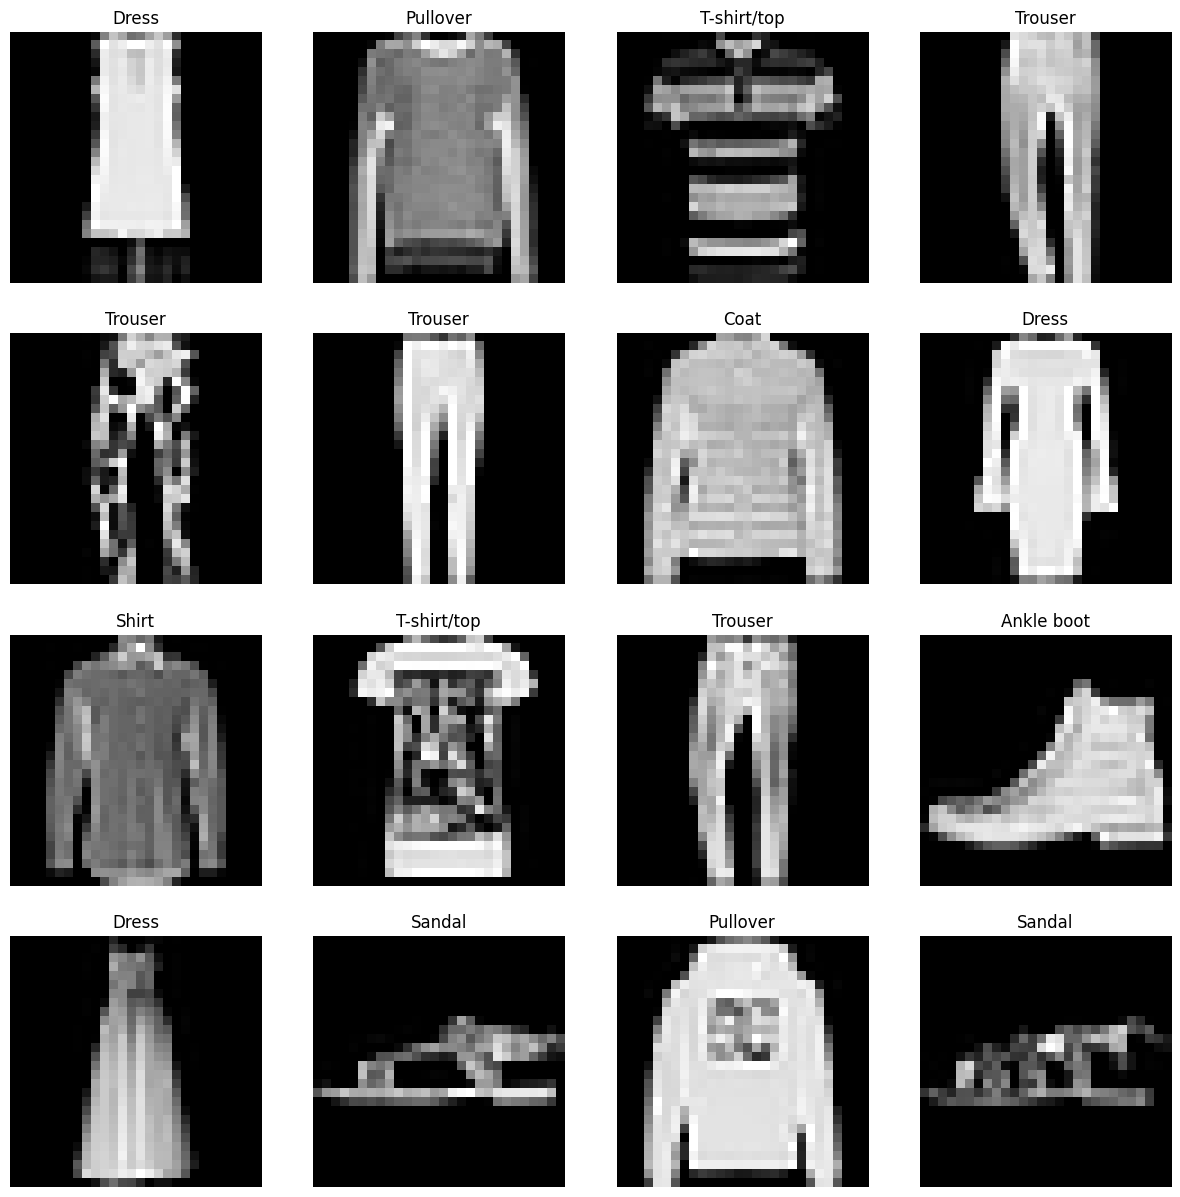

In [68]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(15, 15))
for i in range (16):
    rand_num = np.random.randint(0, 60000)
    plt.subplot(4,4, i+1)
    plt.imshow(x_train[rand_num], cmap='gray')
    plt.axis('off')
    plt.title(classes[y_train[rand_num]])

In [70]:
fmnist = keras.Sequential([
    keras.layers.Rescaling(1/255.0, input_shape=(28,28, 1)),
    
    keras.layers.Conv2D(8, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])


fmnist.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [71]:
fmnist.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 batch_normalization_21 (Bat  (None, 28, 28, 8)        32        
 chNormalization)                                                
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 batch_normalization_22 (Bat  (None, 14, 14, 16)      

In [72]:
fmnist.fit(x_train, y_train, validation_split=0.2,batch_size=32, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3899 - accuracy: 0.8552 - val_loss: 0.3249 - val_accuracy: 0.8801
Epoch 2/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2647 - accuracy: 0.9009 - val_loss: 0.2782 - val_accuracy: 0.9002
Epoch 3/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2235 - accuracy: 0.9157 - val_loss: 0.2710 - val_accuracy: 0.9022
Epoch 4/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1936 - accuracy: 0.9261 - val_loss: 0.2640 - val_accuracy: 0.9050
Epoch 5/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1692 - accuracy: 0.9360 - val_loss: 0.2863 - val_accuracy: 0.8988


In [73]:
fmnist.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3124 - accuracy: 0.8902


[0.312405526638031, 0.8902000188827515]

In [76]:
fmnist.save('models/fmnist.h5')